# Controller for the locking of the laser

In [150]:
%load_ext autoreload
%autoreload 2

from GettingStarted_lib.Interface import Interface
import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Creating the interface:

It contains everything is needed for the comunications with the linien server in the RedPitaya.
- connection to the board;
- Initialization of the parameters;
- Parameters modification.

In [121]:
RP_Interface = Interface()

2025-12-04 09:53:41 - Interface - INFO - Configuration loaded from /home/bec3/Desktop/Simone_Damian/Serafini/GettingStarted_lib/connect_config.yaml:

2025-12-04 09:53:41 - Interface - INFO - Attempting connection via RedPitaya_K address (192.168.1.159:18862)


linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       DEBUG    Sent authentication hash


linien_client.connection       INFO     Connection established!


2025-12-04 09:53:45 - Interface - INFO - Connected to device via RedPitaya_K address


In [59]:
pprint.pprint(vars(RP_Interface))

{'DEVICES': {'RedPitaya_K': {'ip': '192.168.1.159',
                             'linien_port': 18862,
                             'ssh_port': 22}},
 'PASSWORD': 'root',
 'USERNAME': 'root',
 'client': <linien_client.connection.LinienClient object at 0x7078b400df30>,
 'device': Device(key='dhmtcalcvf',
                  name='',
                  host='192.168.1.159',
                  port=18862,
                  username='root',
                  password='root',
                  parameters={}),
 'logger': <Logger Interface (INFO)>,
 'readable_params': {'control_signal_history': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffea40>,
                     'monitor_signal_history': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffc1f0>,
                     'sweep_signal': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffdc00>},
 'writeable_params': {'big_offset': <GettingStarted_lib.Interface.WriteableParameter object at 0x70

In [51]:
RP_Interface.set_value('pid_p', 2000)
print(RP_Interface.writeable_params['pid_p'].value)
RP_Interface.client.parameters.check_for_changed_parameters()
print(RP_Interface.client.parameters.p.value)

In [68]:
RP_Interface.start_sweep()

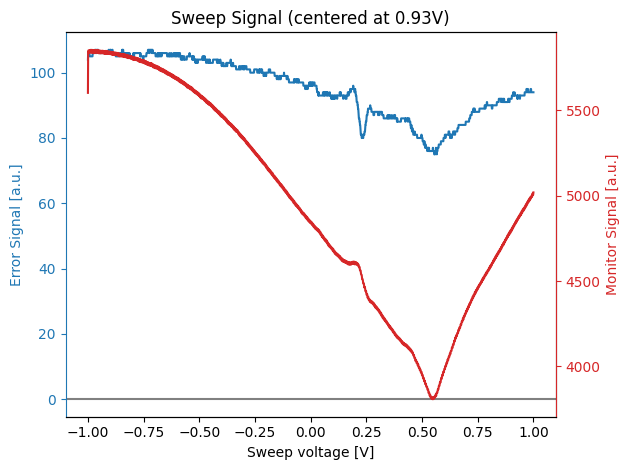

In [151]:
RP_Interface.plot_sweep()

In [154]:
RP_Interface.client.parameters.offset_a.value = 2

In [156]:
RP_Interface.get_remote_value('offset_a')

2

In [123]:
RP_Interface.adjust_vertical_offset()

Actual offset_a: -8191


TypeError: unsupported operand type(s) for /: 'str' and 'float'